### Importign the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,KBinsDiscretizer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso,ElasticNet,SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Lodign CSV file 

house = pd.read_csv("boston_housing_clean.csv")
house.sample(5) # showing the data randomely

CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
57    0.01432  100.0   1.32     0  0.411  6.816   40.5  8.3248    5  256.0   
214   0.28955    0.0  10.59     0  0.489  5.412    9.8  3.5875    4  277.0   
144   2.77974    0.0  19.58     0  0.871  4.903   97.8  1.3459    5  403.0   
407  11.95110    0.0  18.10     0  0.659  5.608  100.0  1.2852   24  666.0   
88    0.05660    0.0   3.41     0  0.489  7.007   86.3  3.4217    2  270.0   

     PTRATIO       B  LSTAT  MEDV  
57      15.1  392.90   3.95  31.6  
214     18.6  348.93  29.55  23.7  
144     14.7  396.90  29.29  11.8  
407     20.2  332.09  12.13  27.9  
88      17.8  396.90   5.50  23.6

In [4]:
# statical data analysic

house.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
# Information about the data 

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Doing the preprocessing an the data set


In [15]:
import copy
house1 = copy.deepcopy(house)
print(house1.isnull().sum())
print()
print("duplicated is :",house1.duplicated().sum())
print()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

duplicated is : 0



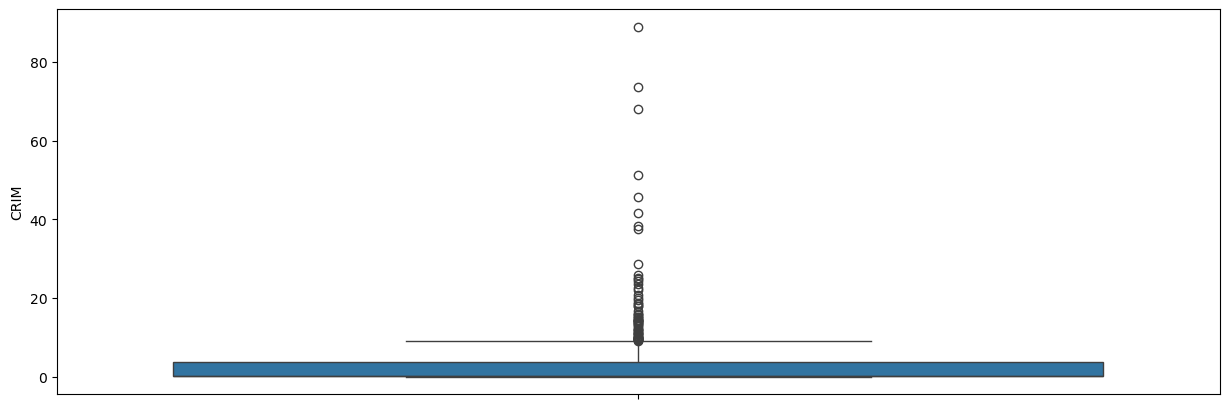

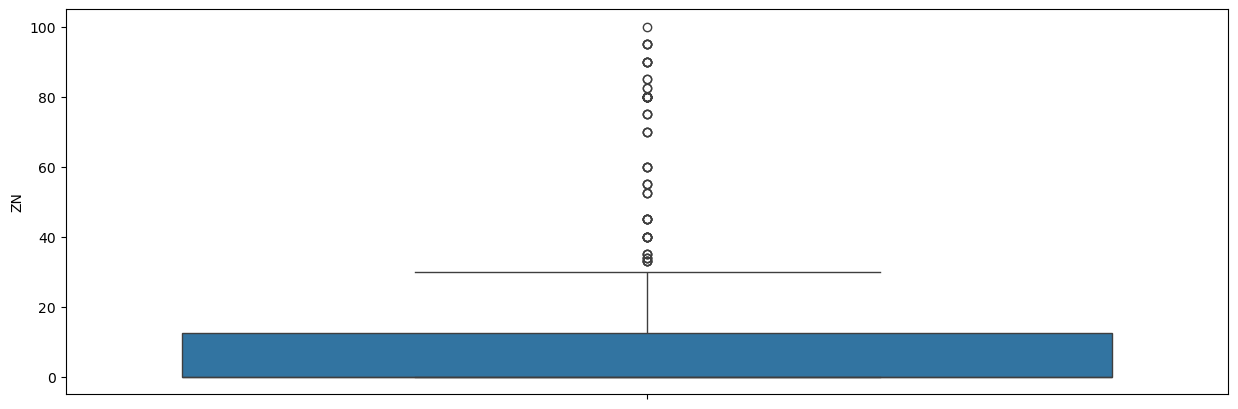

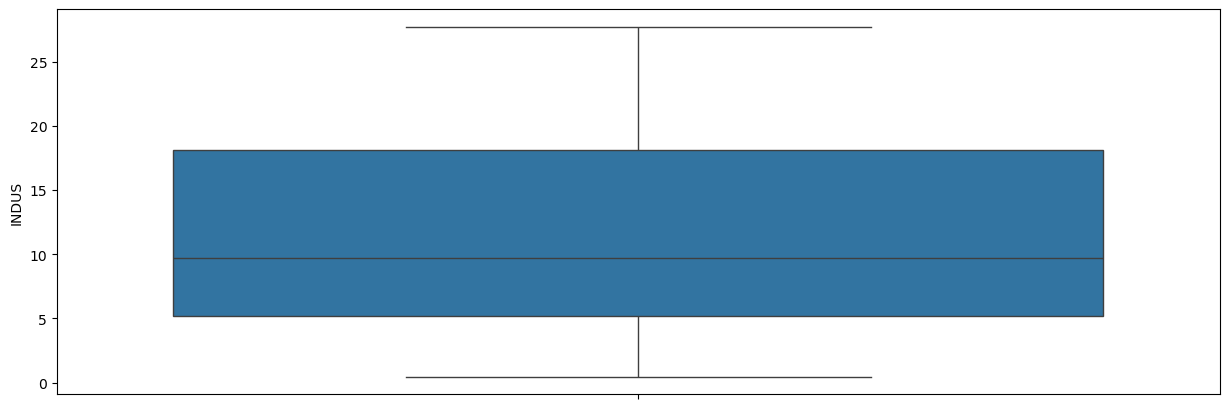

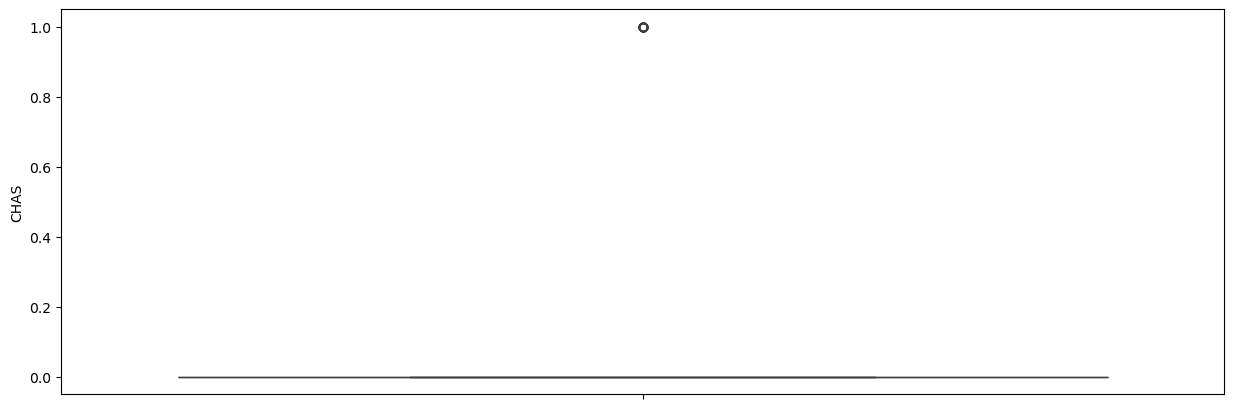

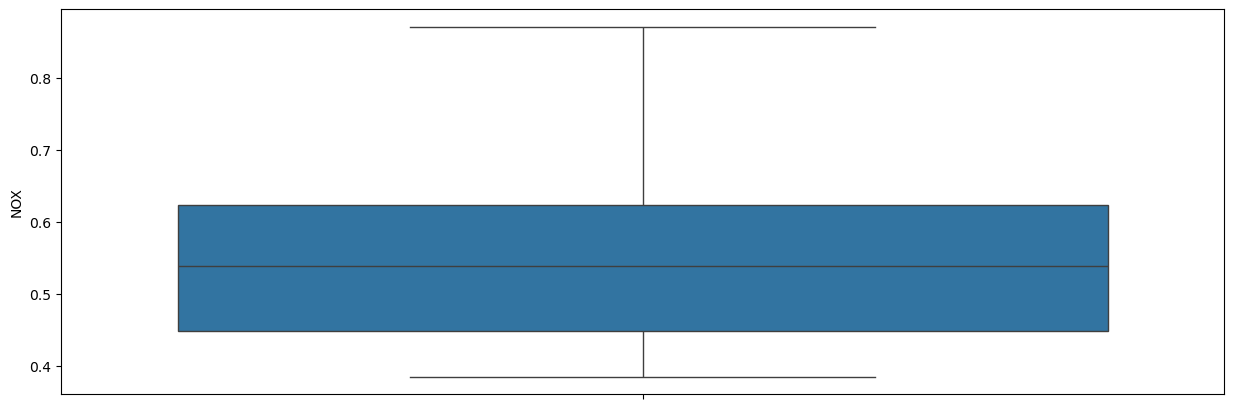

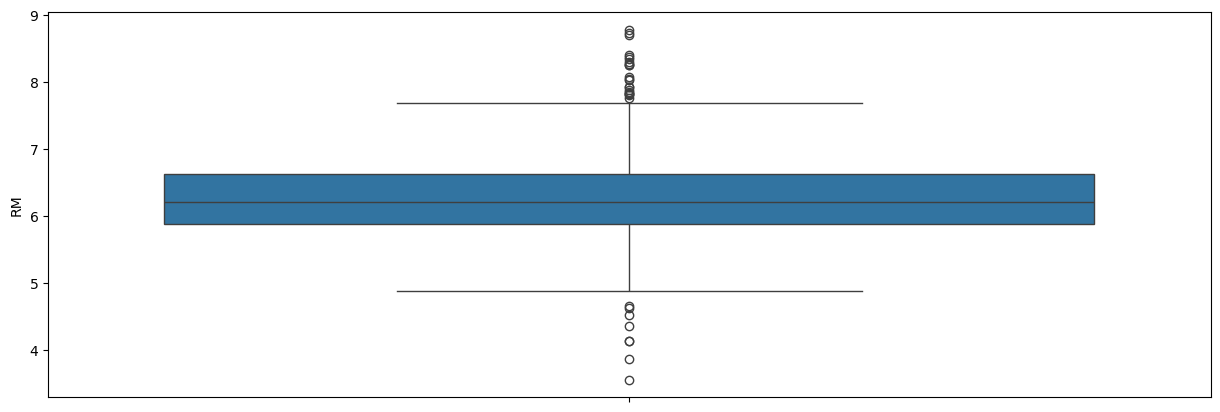

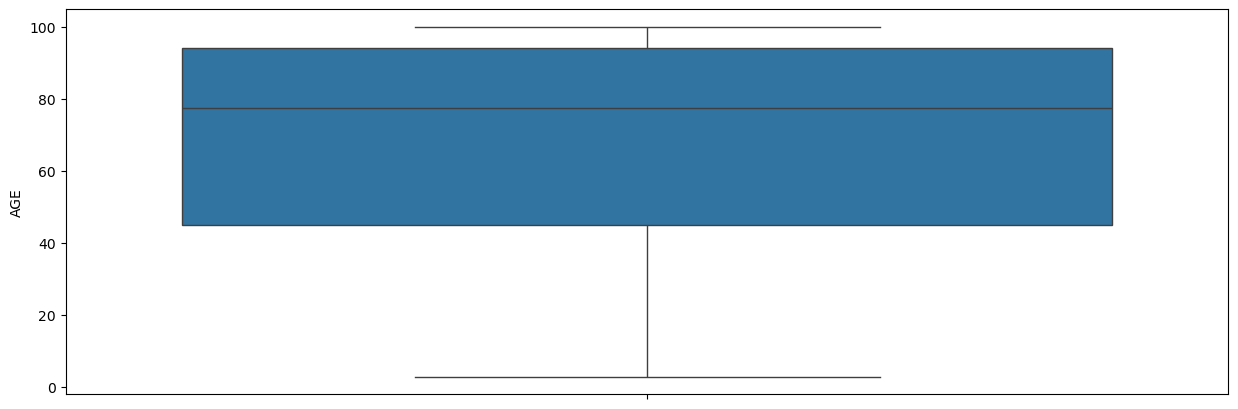

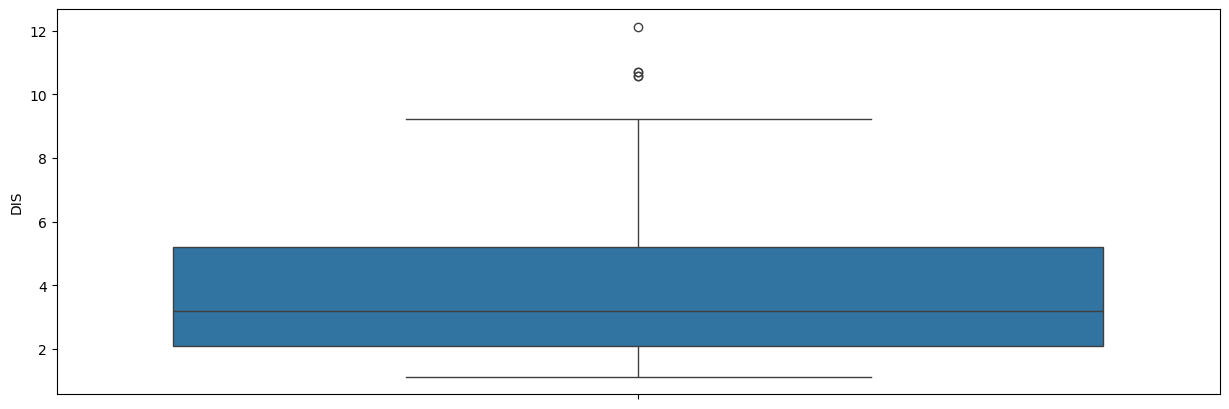

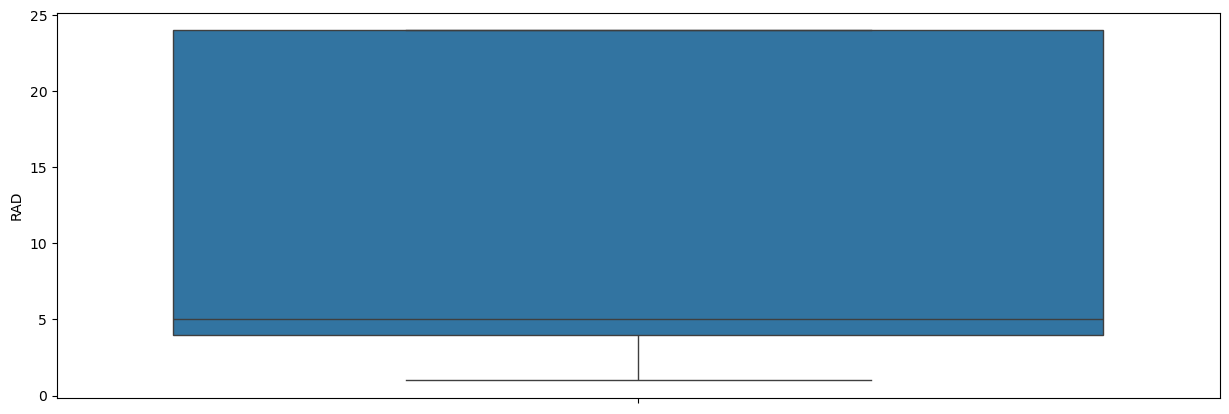

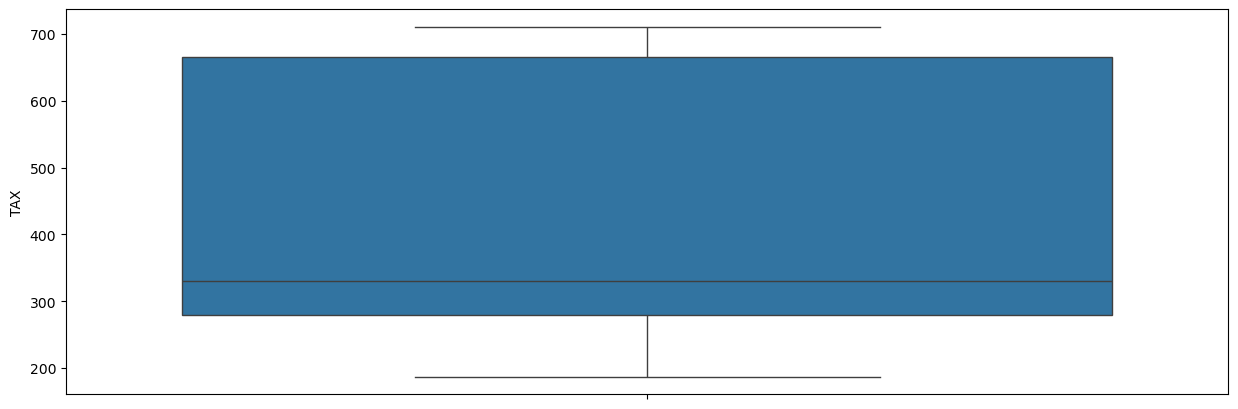

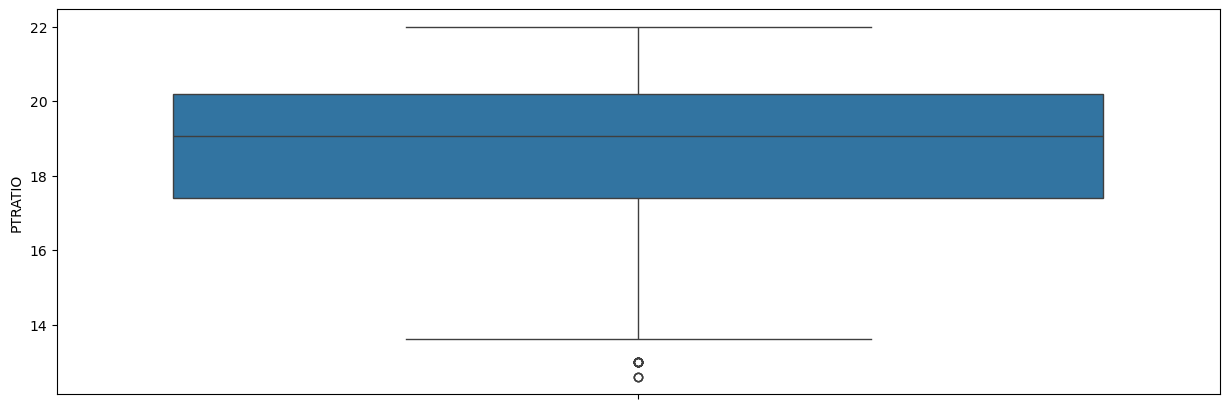

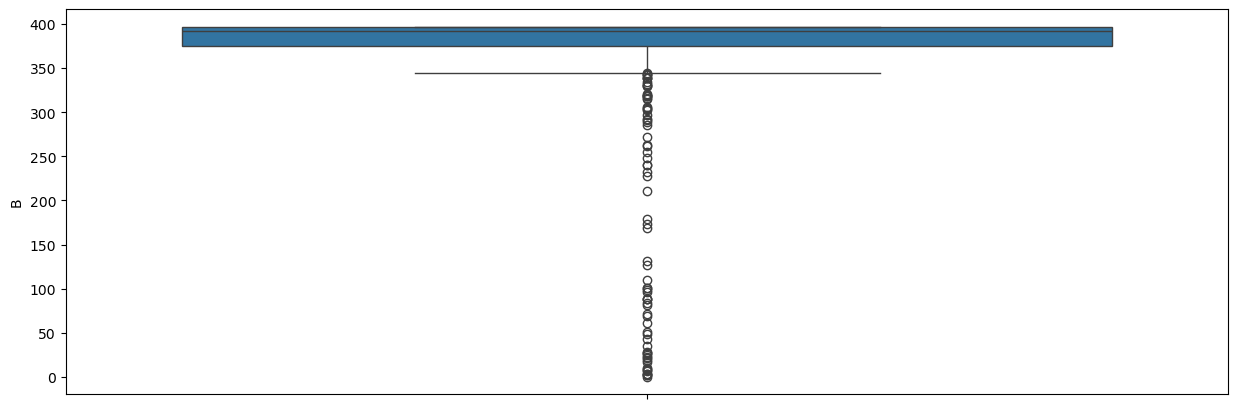

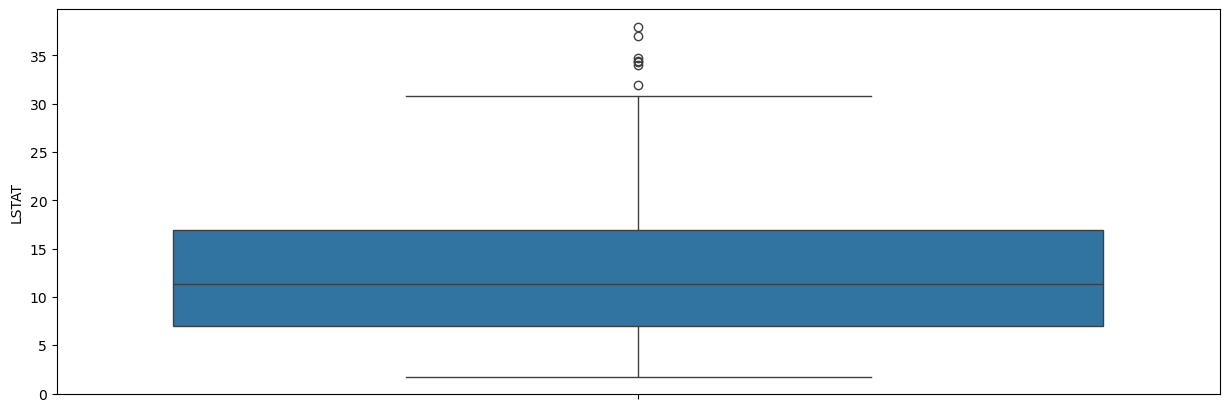

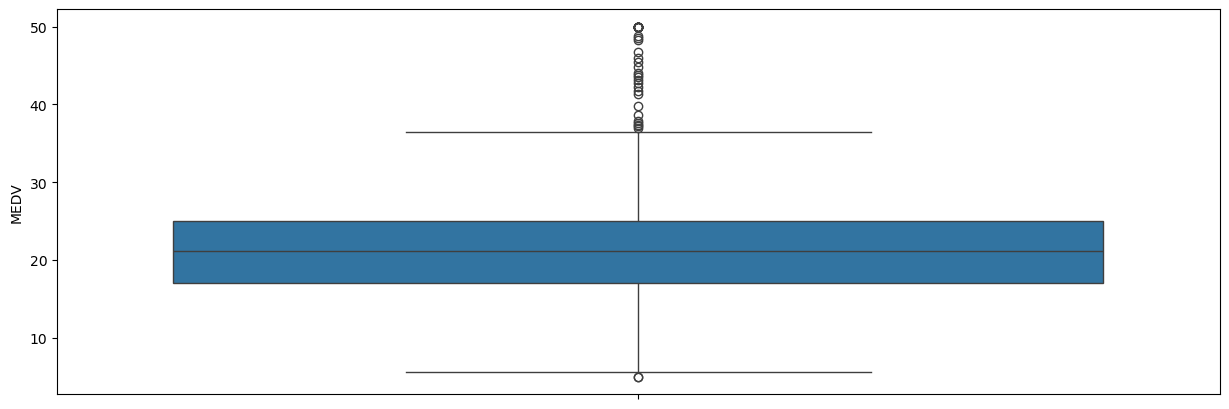

In [ ]:
# visulation using the box plot to find the outiler
for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(house1[col])

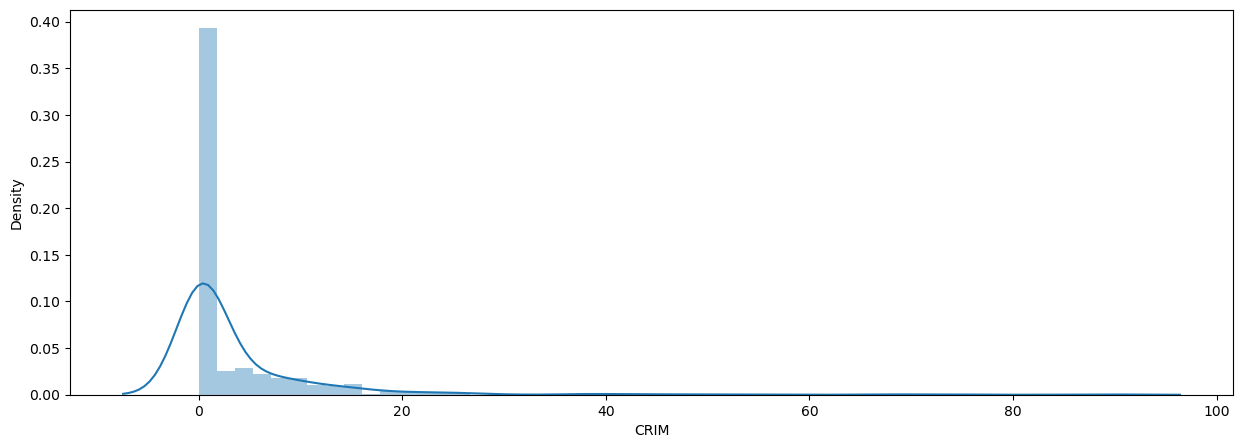

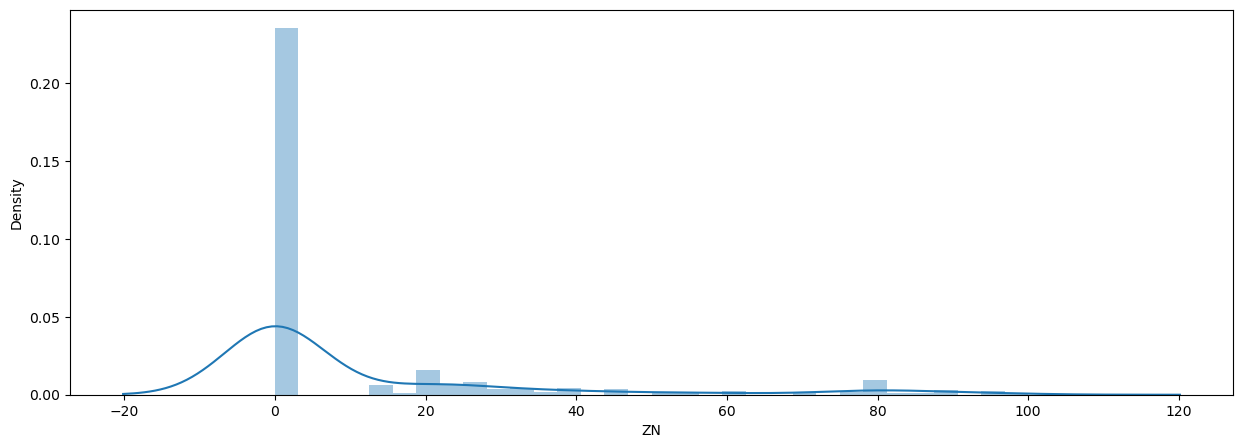

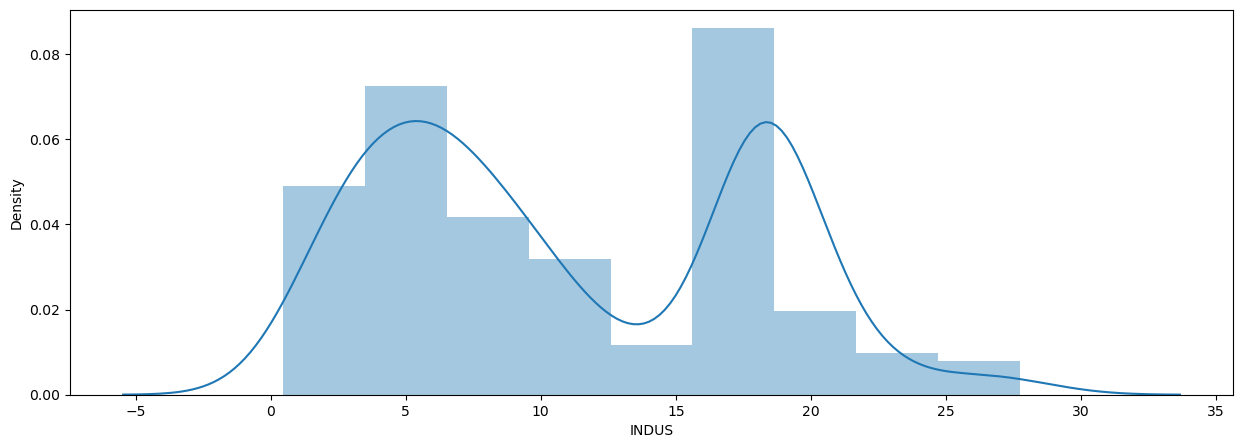

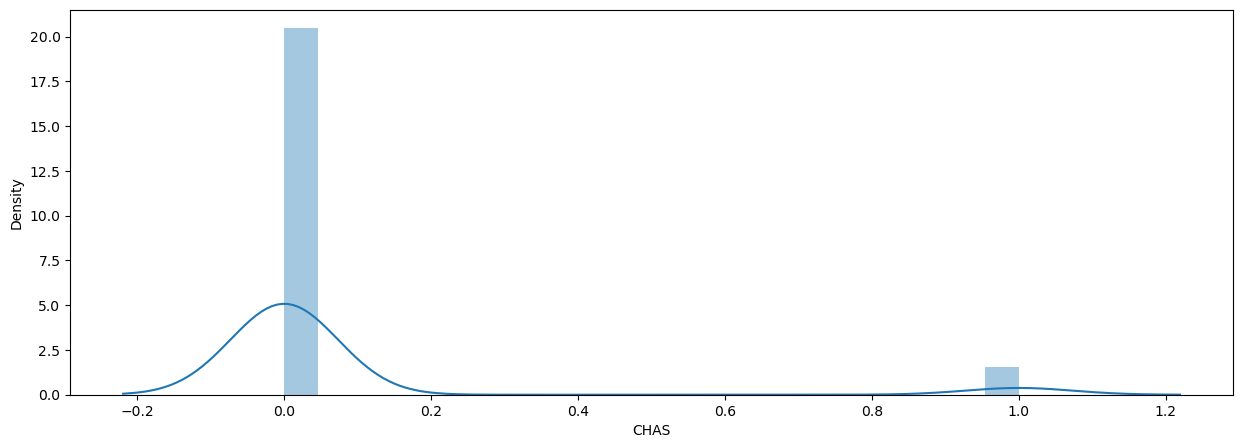

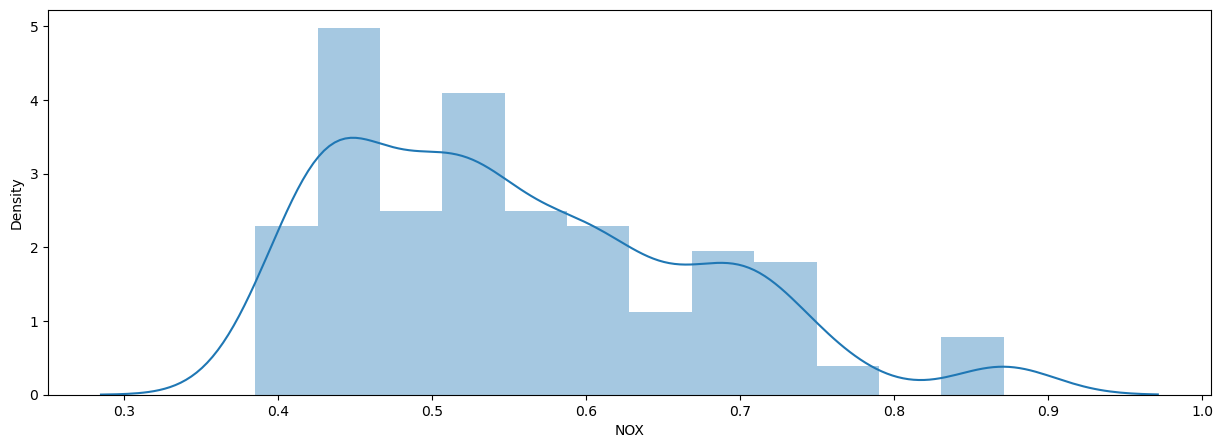

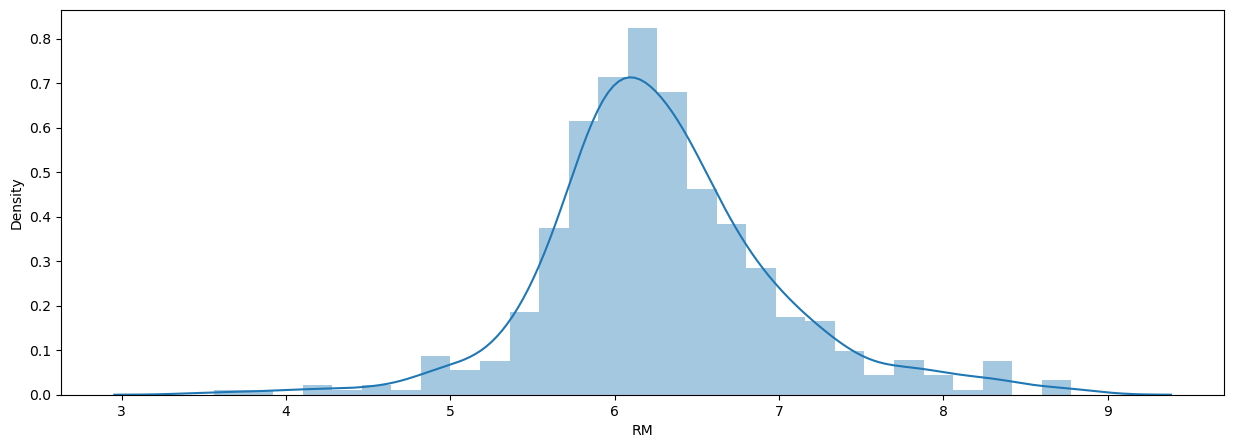

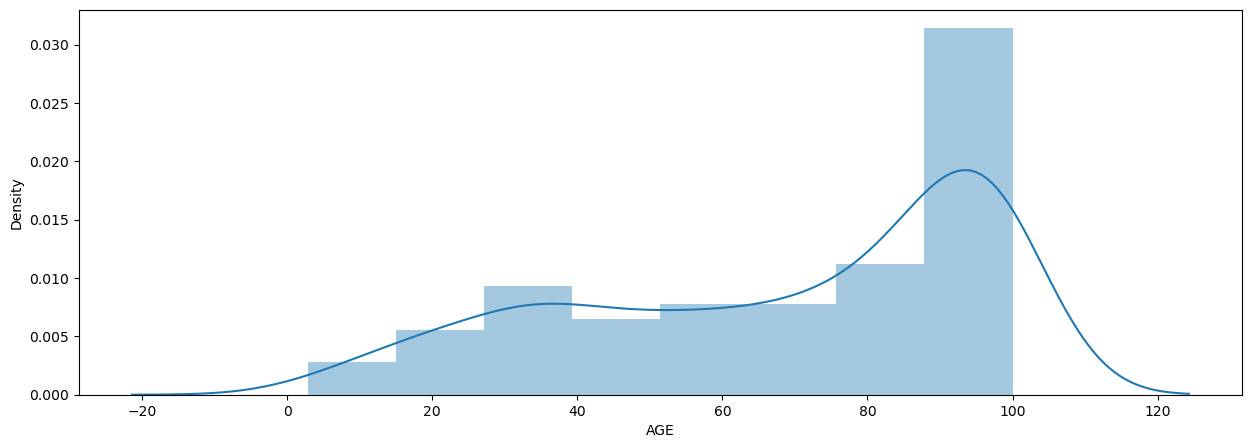

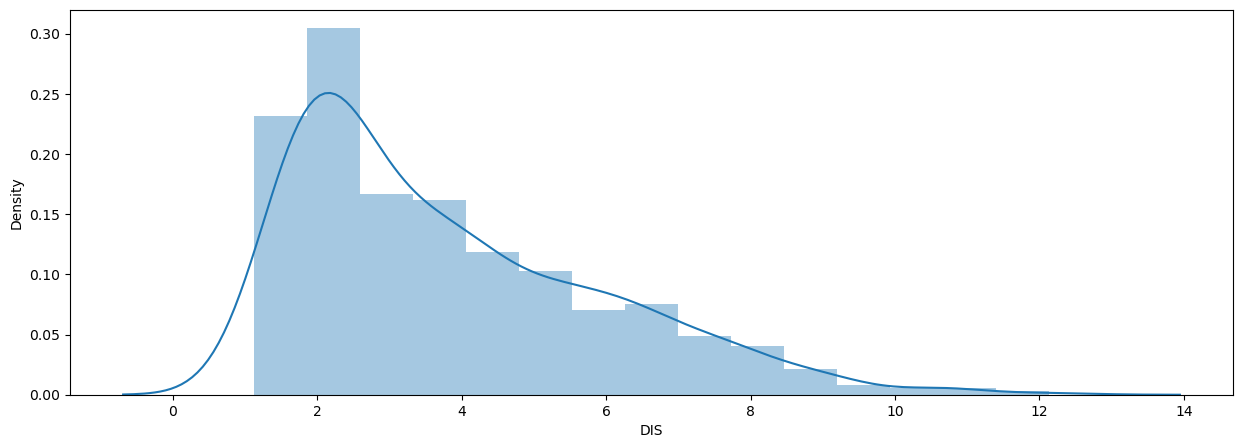

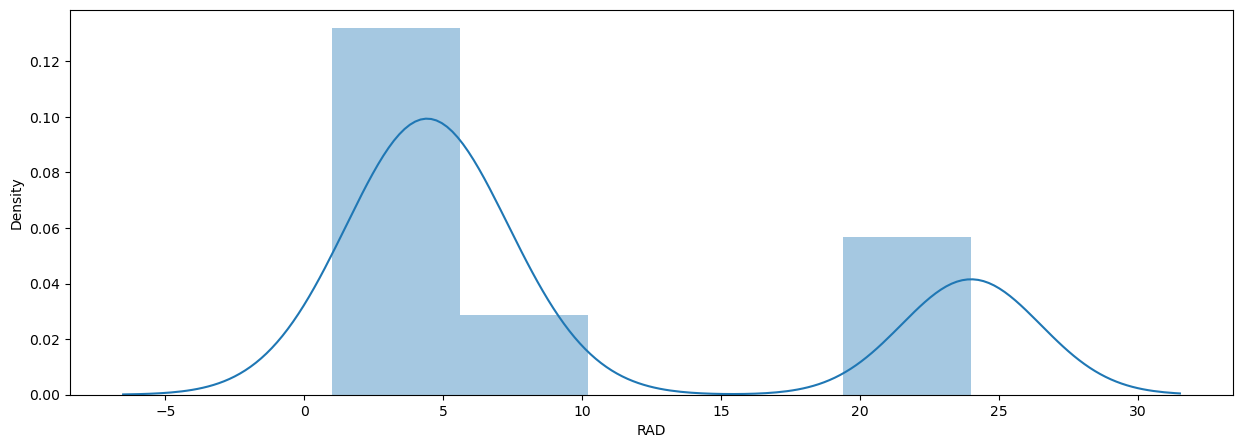

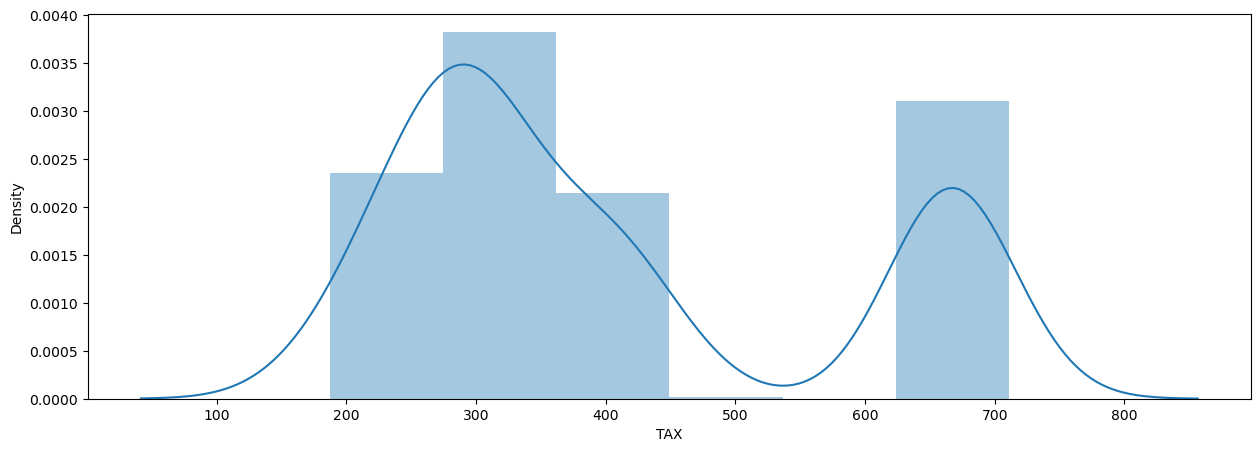

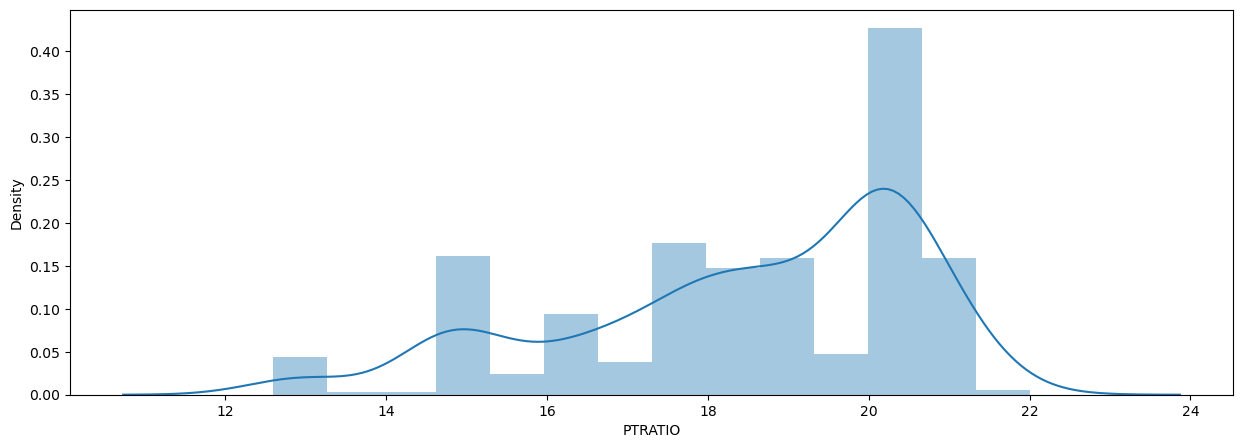

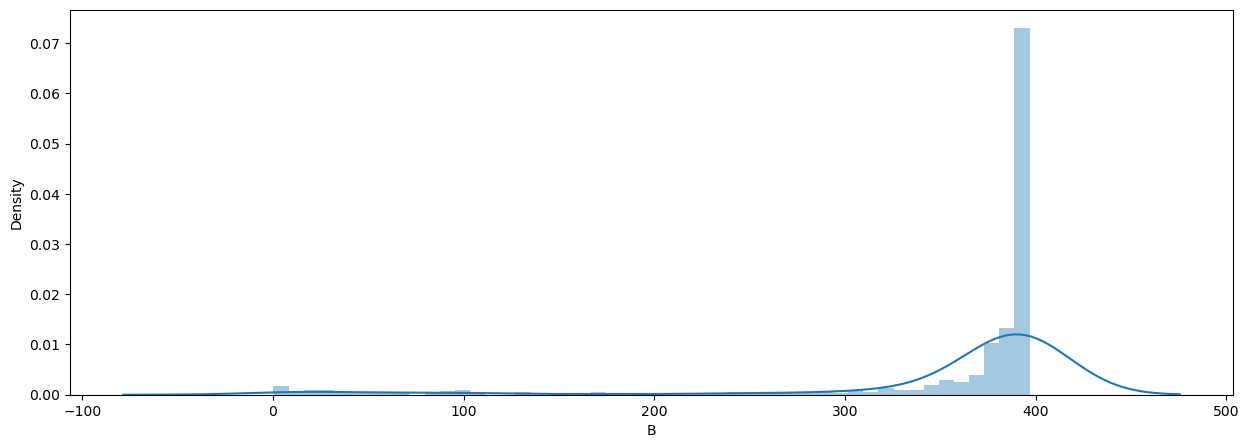

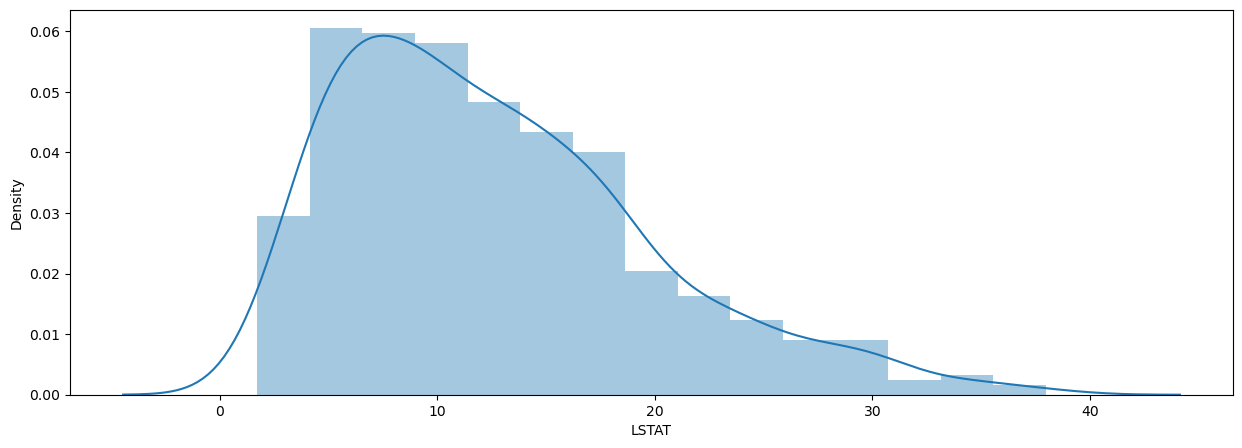

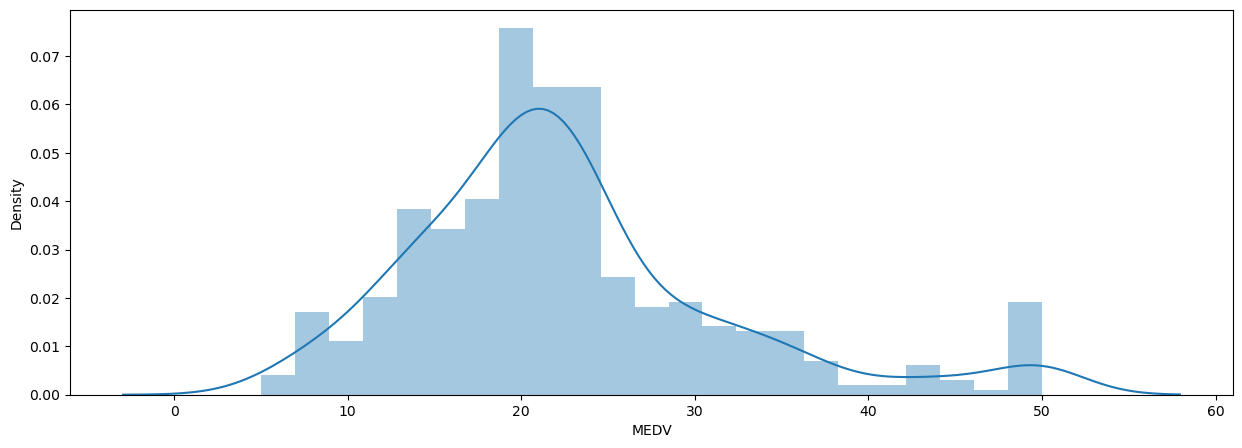

In [17]:
# visulation using the dist plot to find the outiler
import warnings
warnings.filterwarnings("ignore")
for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.distplot(house1[col])

In [18]:
def iqr_range(col):
    # Calculate the first and third quartiles of the column
    Q1 = house1[col].quantile(0.25)
    Q3 = house1[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    # Values below are set to lower_bound, above are set to upper_bound
    house1[col] = np.where(
        house1[col] < lower_bound, lower_bound,
        np.where(house1[col] > upper_bound, upper_bound, house1[col])
    )

In [19]:
def Z_score(col):
    # Define the upper and lower bounds using Z-score method (¬±3 standard deviations from mean)
    upper_bound = house1[col].mean() + 3 * house1[col].std()
    lower_bound = house1[col].mean() - 3 * house1[col].std()
    
    # Cap values outside the Z-score range
    # Values below the lower bound are set to lower_bound
    # Values above the upper bound are set to upper_bound
    house1[col] = np.where(
        house1[col] < lower_bound, lower_bound,
        np.where(house1[col] > upper_bound, upper_bound, house1[col])
    )

In [20]:
importance_cols = ["CRIM","ZN","RM","DIS","PTRATIO","B","LSTAT","MEDV"]
importance_cols1 = ["INDUS","NOX","AGE","TAX"]

In [21]:
# Removing the outiler

for col in importance_cols:
    iqr_range(col)
    
# Commonly removes points with Z-score beyond ¬±3 (i.e., more than 3 standard deviations from mean).

for cols in importance_cols1:
    Z_score(cols)

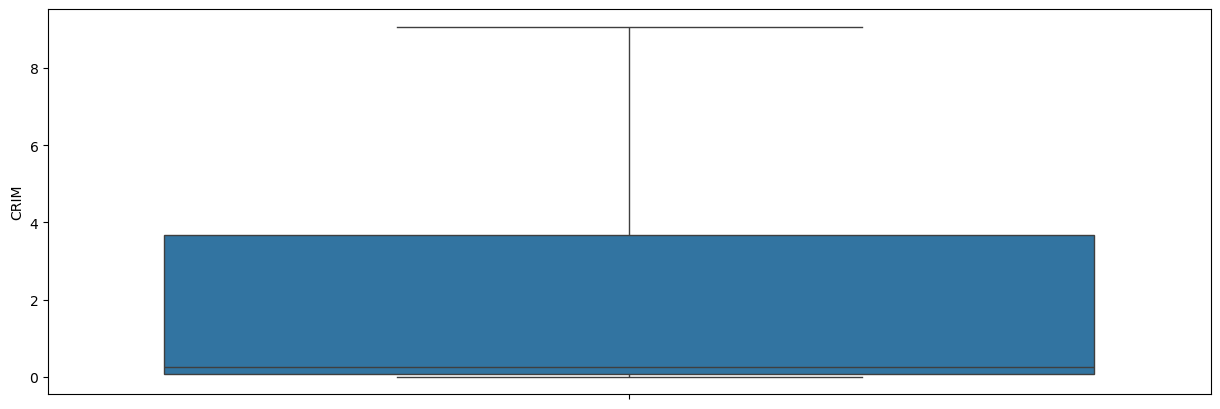

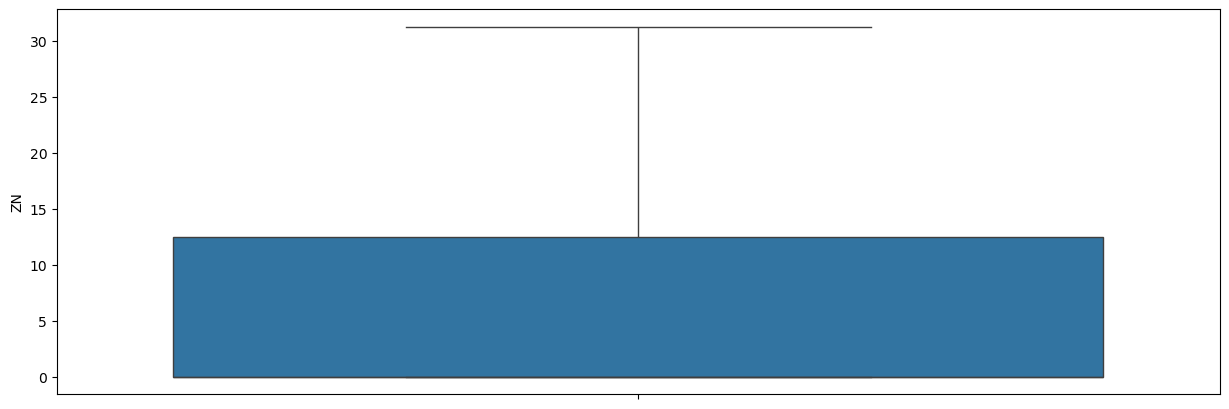

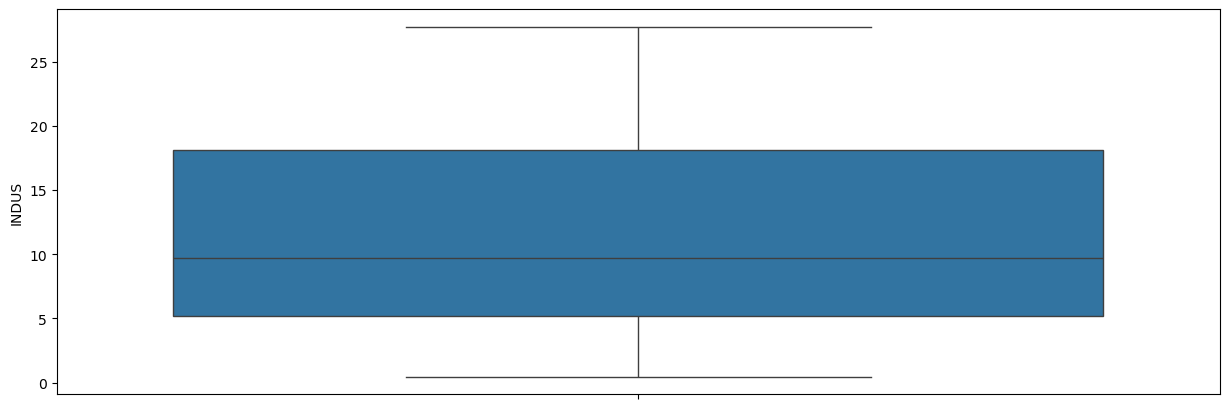

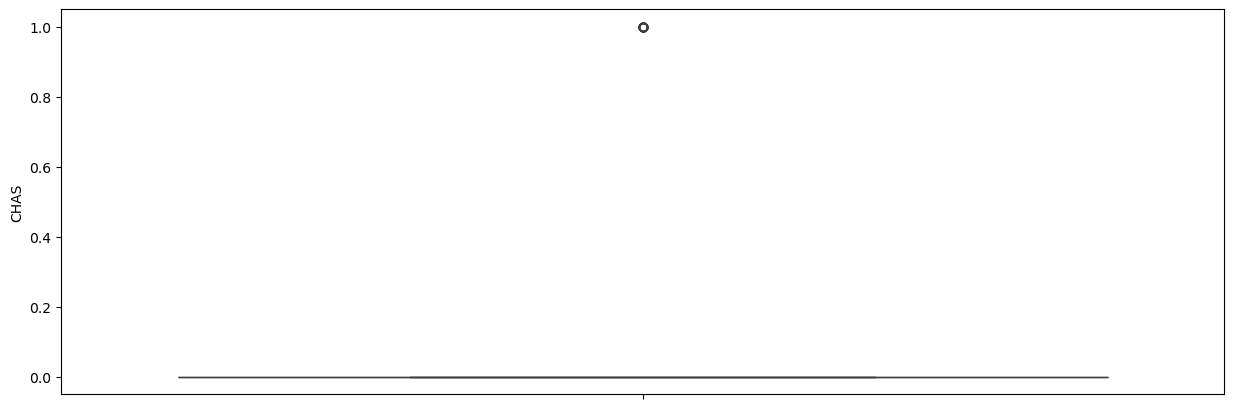

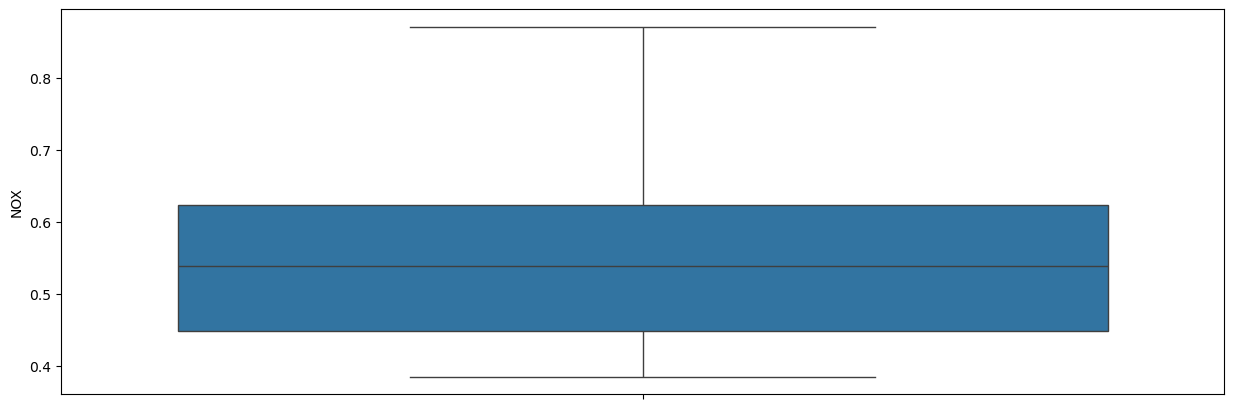

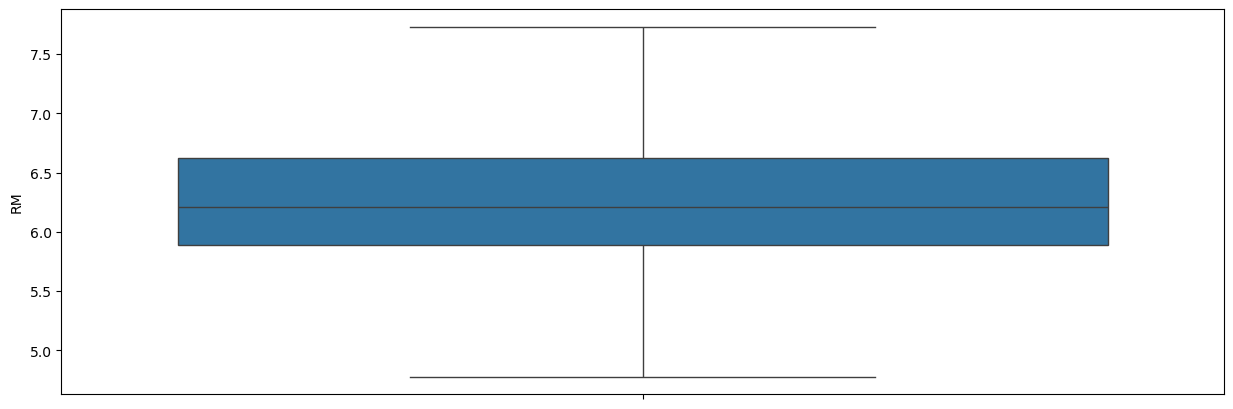

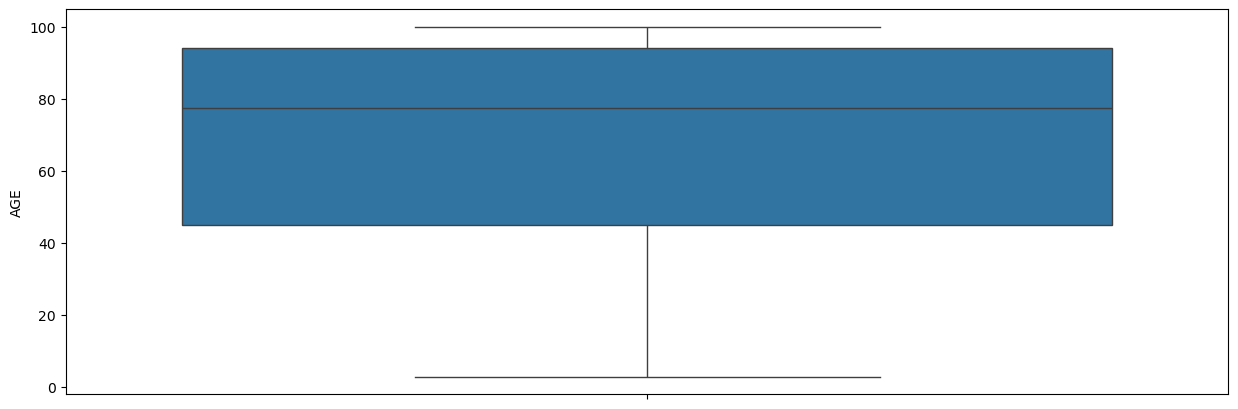

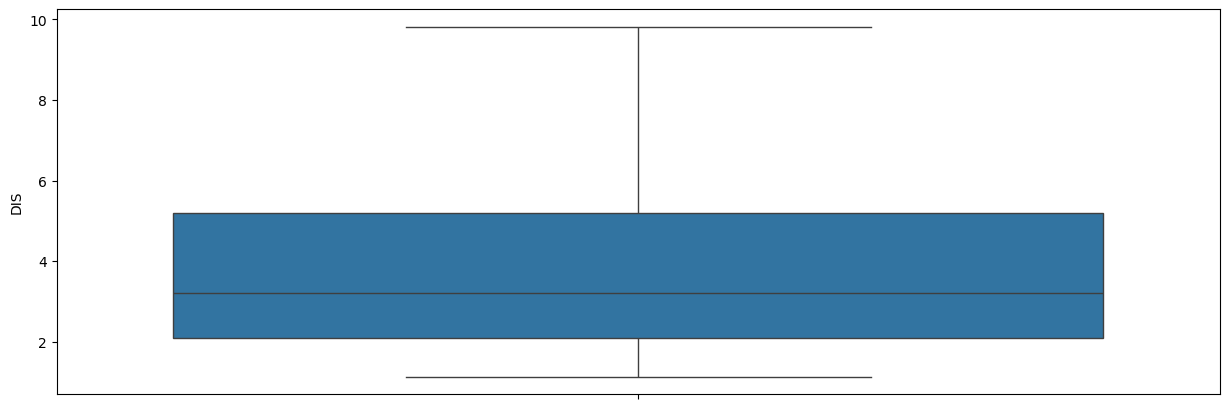

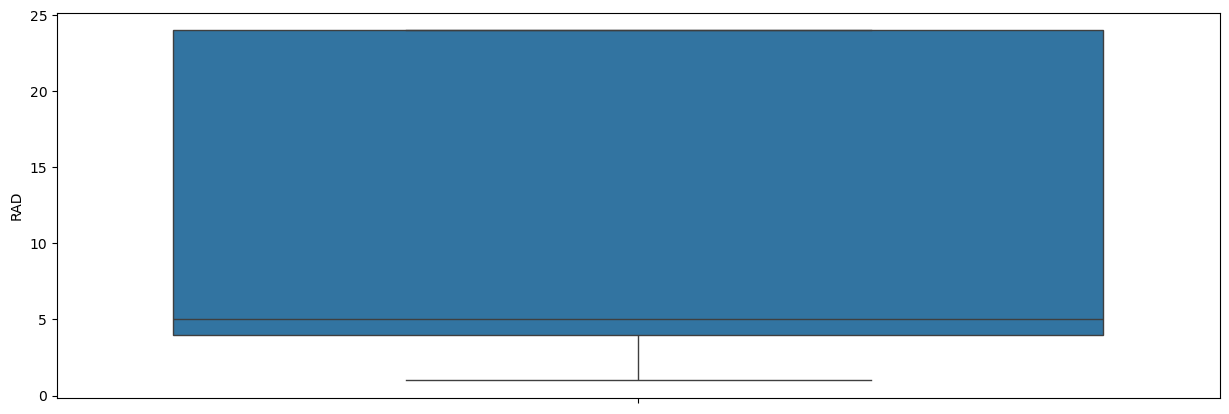

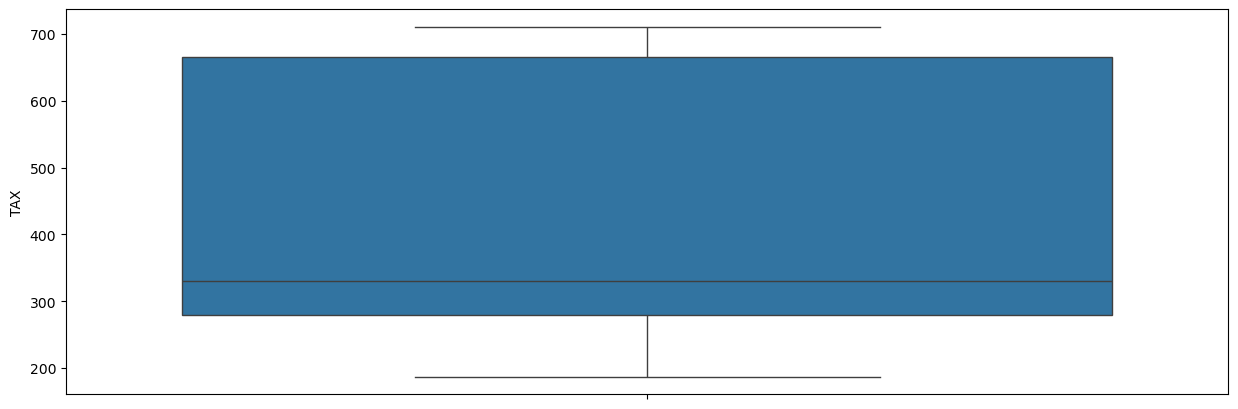

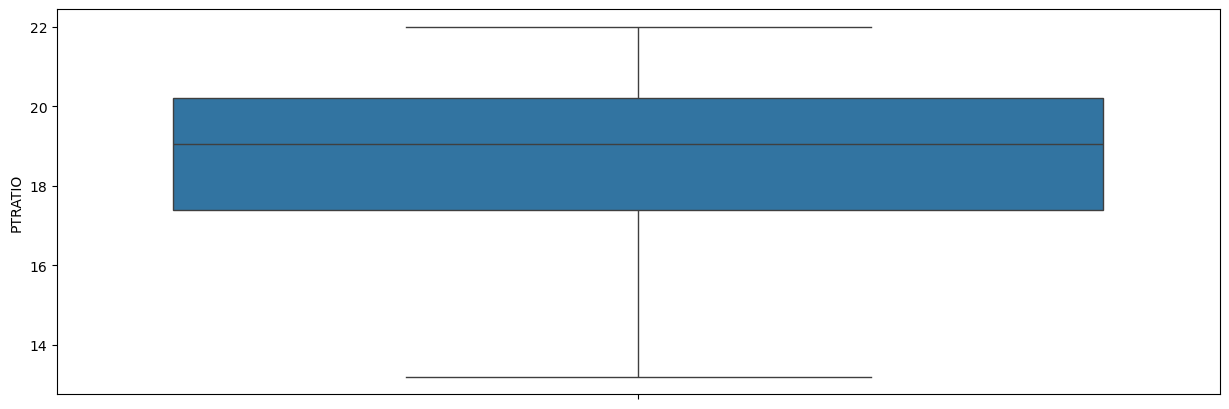

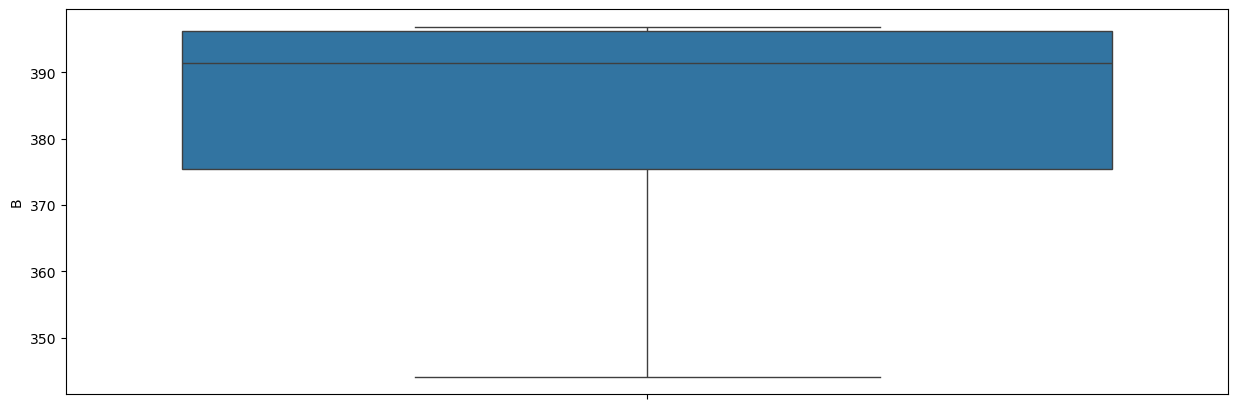

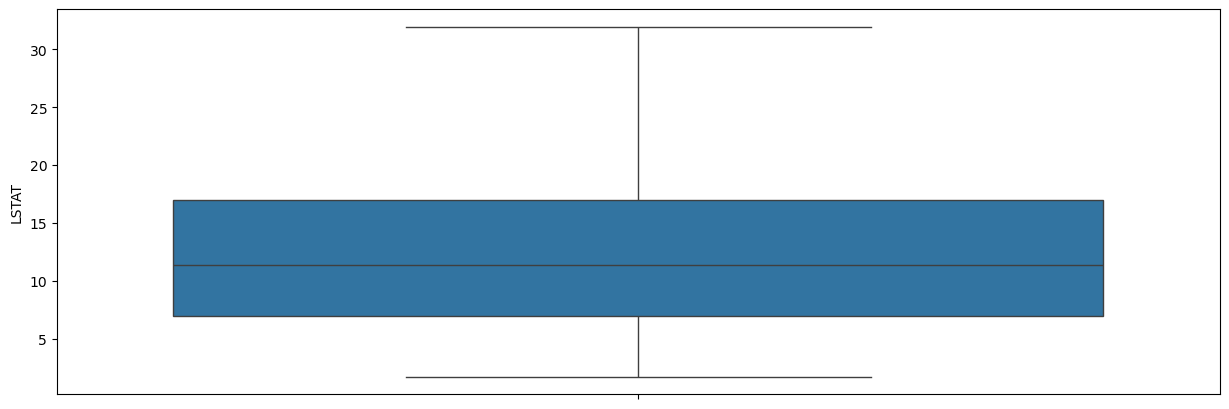

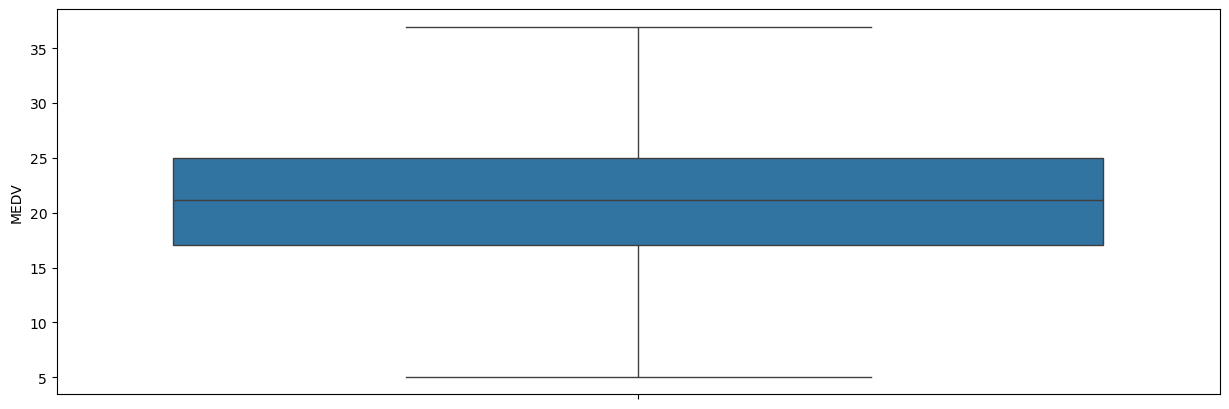

In [22]:
# Afterapplying the removing the outilr
# visulation using the box plot

for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(house1[col])

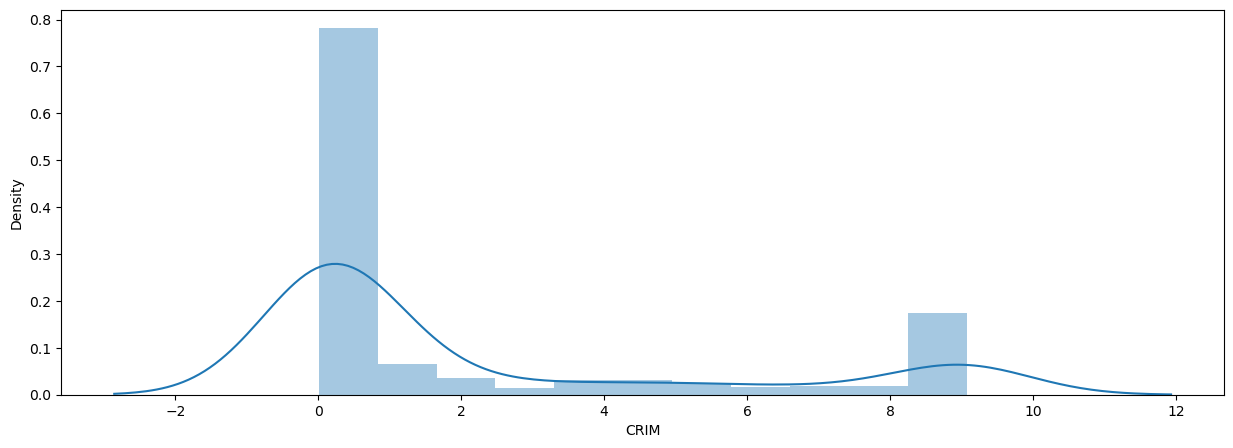

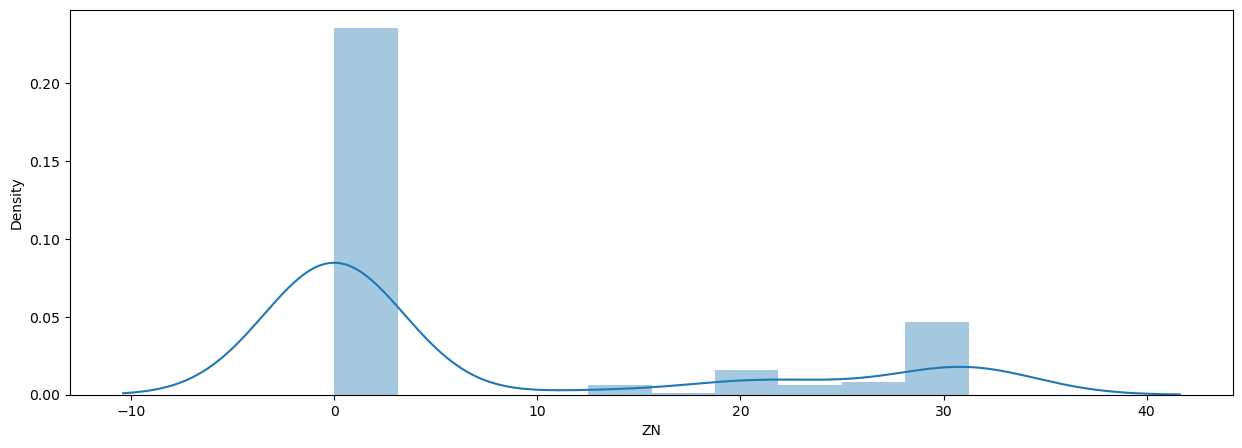

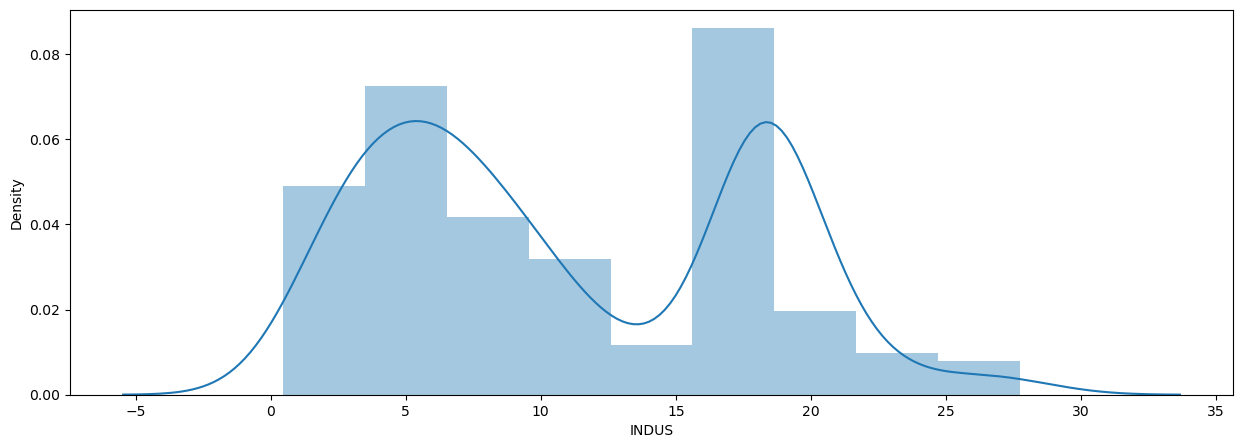

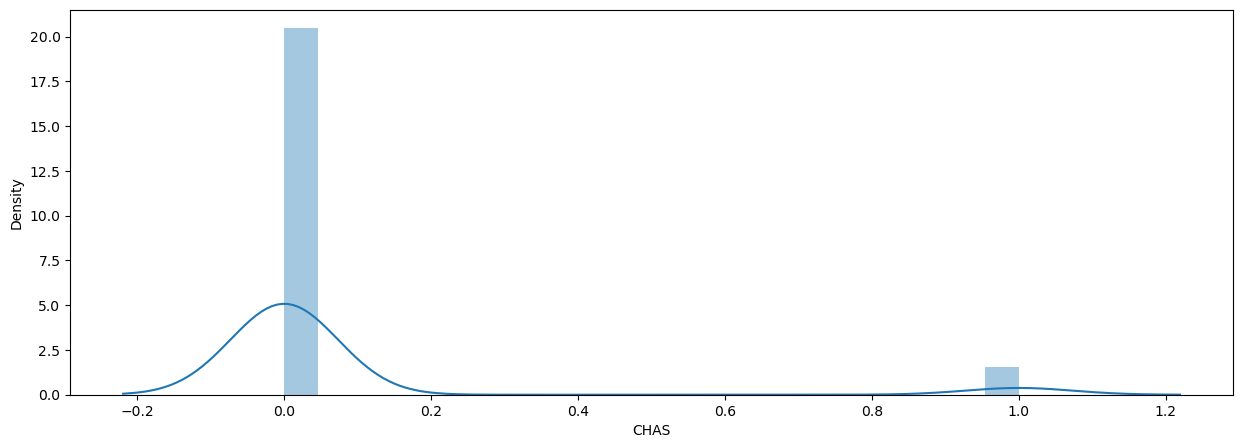

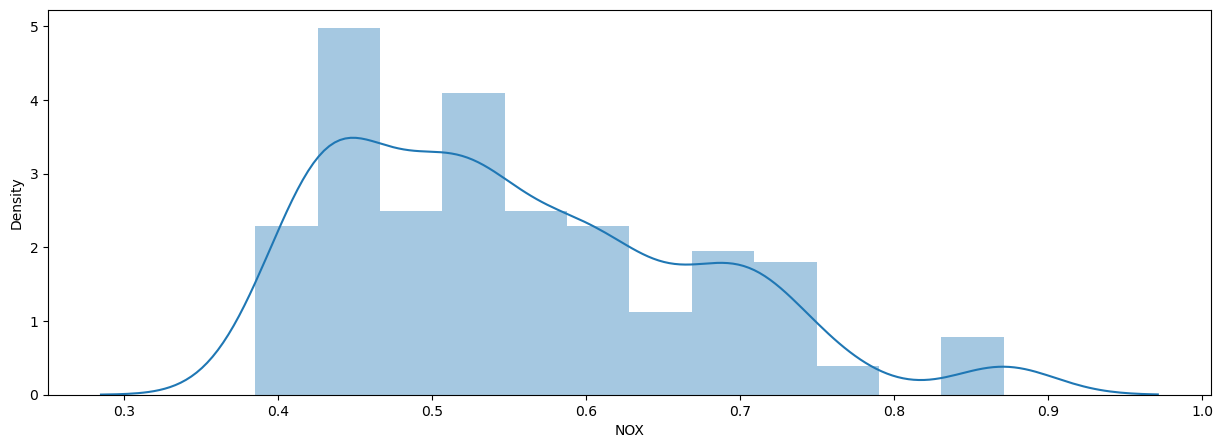

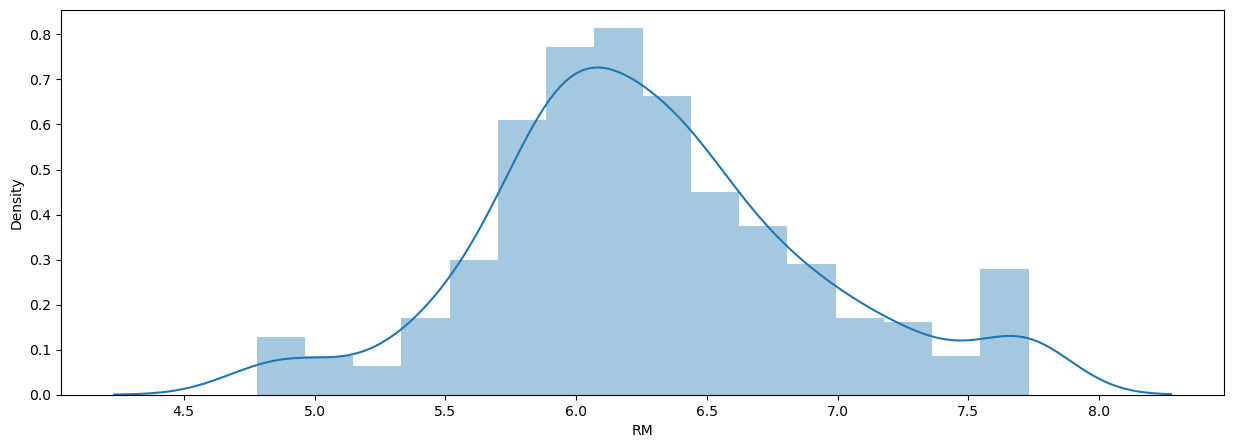

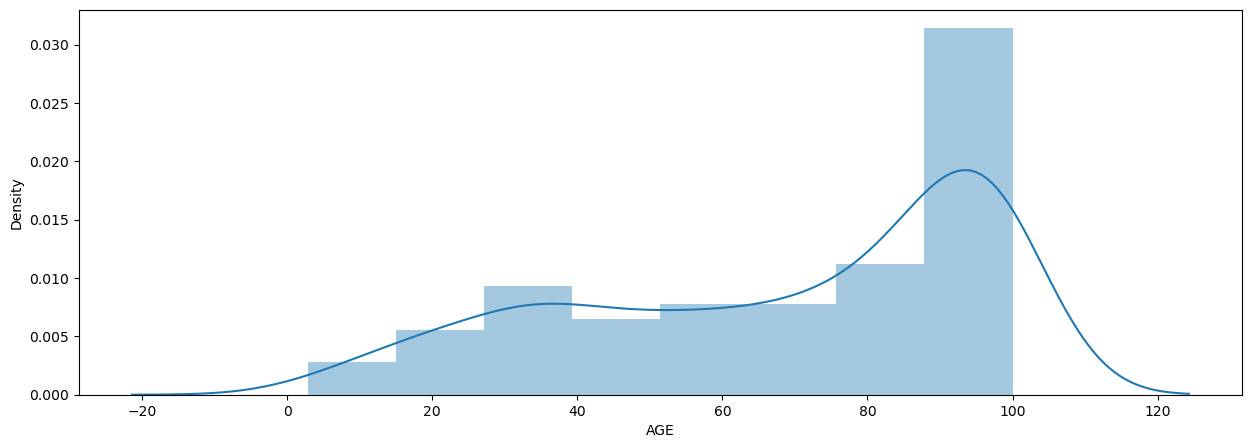

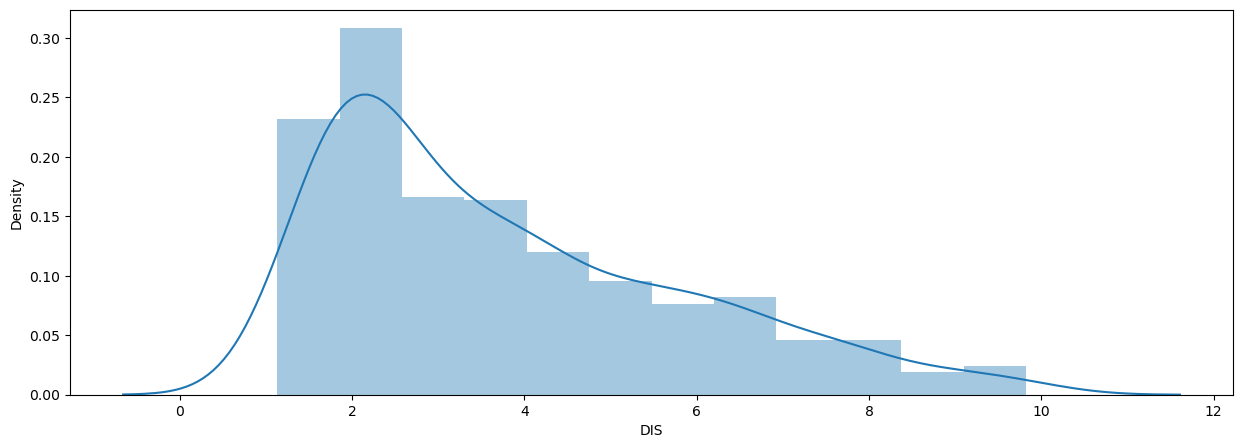

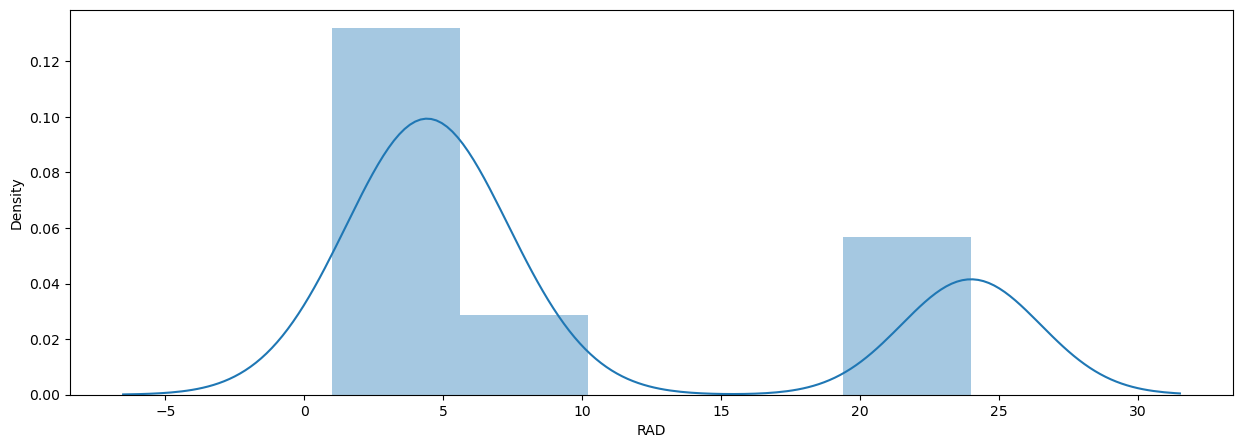

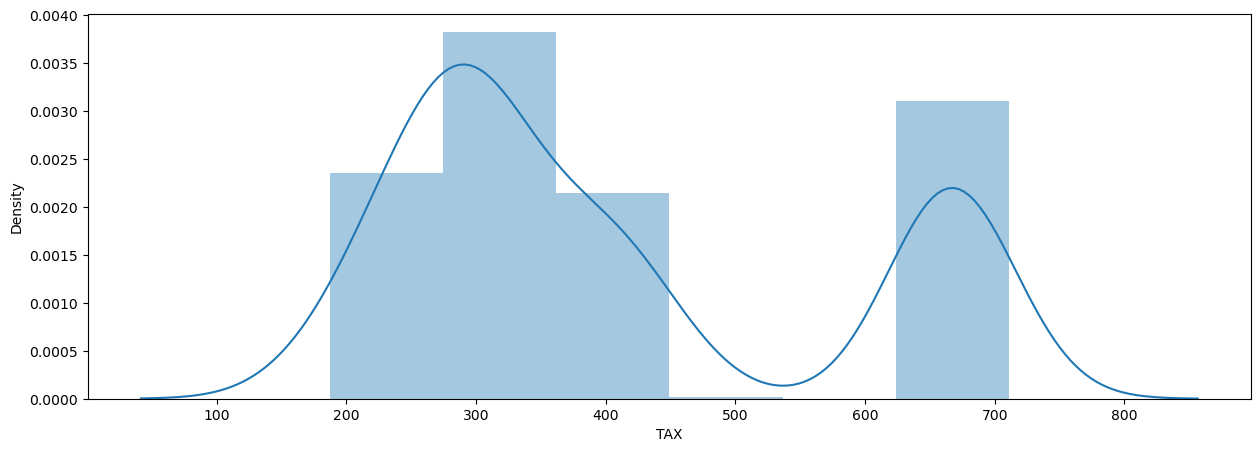

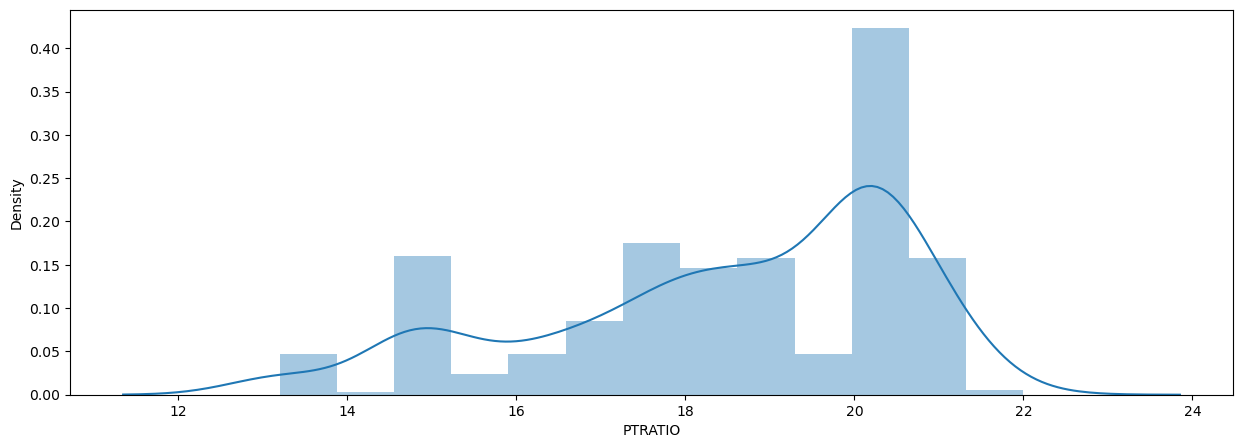

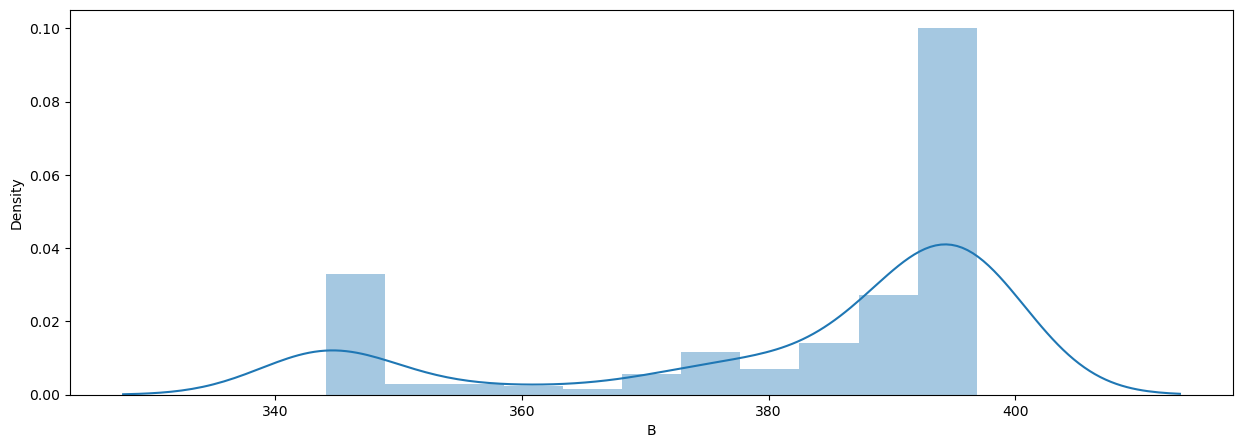

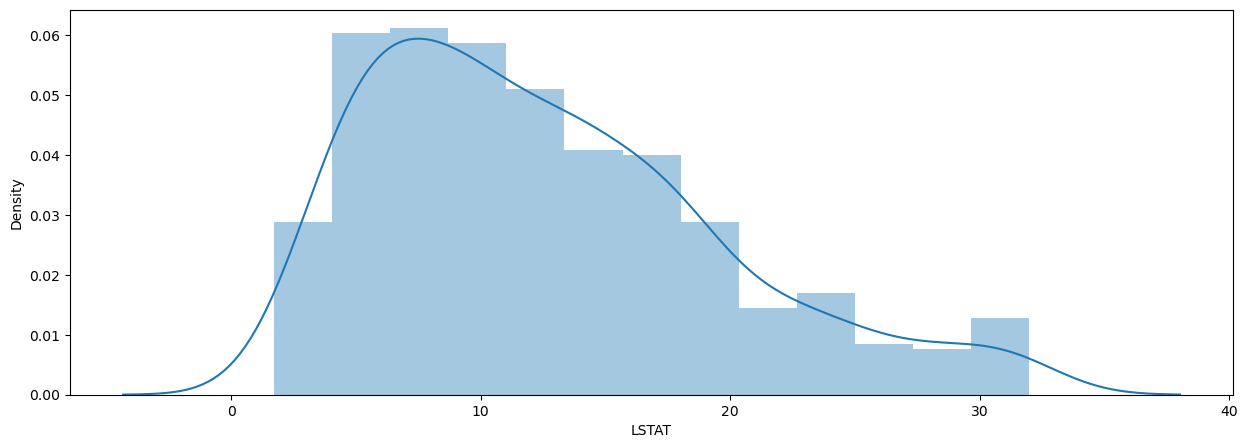

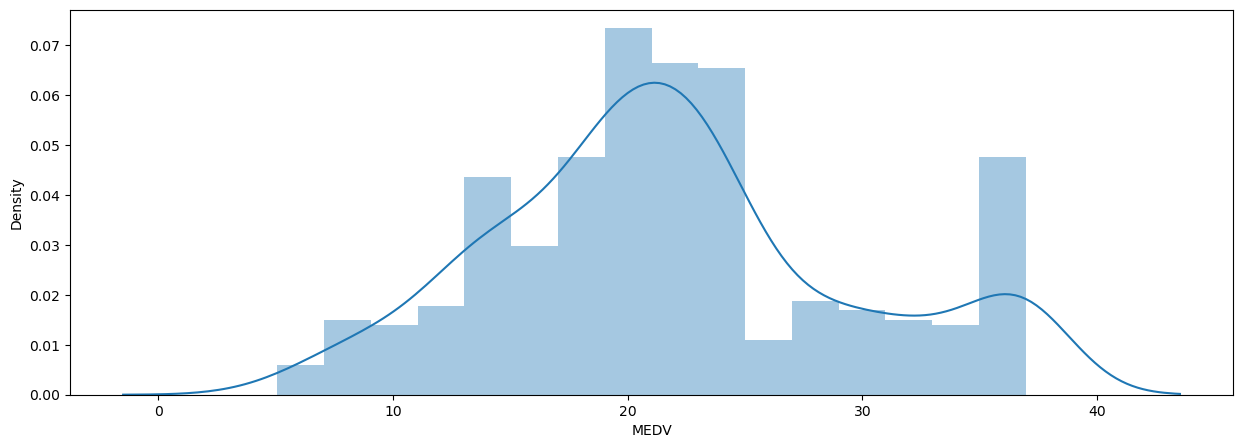

In [23]:
# After removiegn outiler visulation using the dist plot
import warnings
warnings.filterwarnings("ignore")


for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.distplot(house1[col])

In [24]:
# Compute the correlation matrix using only numeric columns
# Useful for identifying relationships and multicollinearity among features
matrix_corr = house1.corr(numeric_only=True)

In [25]:
matrix_corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.370213  0.629315 -0.030748  0.663412 -0.260057  0.518951   
ZN      -0.370213  1.000000 -0.584079 -0.038059 -0.549670  0.357439 -0.583149   
INDUS    0.629315 -0.584079  1.000000  0.062938  0.763651 -0.408704  0.644779   
CHAS    -0.030748 -0.038059  0.062938  1.000000  0.091203  0.081545  0.086518   
NOX      0.663412 -0.549670  0.763651  0.091203  1.000000 -0.322413  0.731470   
RM      -0.260057  0.357439 -0.408704  0.081545 -0.322413  1.000000 -0.258788   
AGE      0.518951 -0.583149  0.644779  0.086518  0.731470 -0.258788  1.000000   
DIS     -0.555054  0.681019 -0.713079 -0.099435 -0.775934  0.224486 -0.753333   
RAD      0.926977 -0.344043  0.595129 -0.007368  0.611441 -0.206041  0.456022   
TAX      0.870686 -0.383860  0.720760 -0.035587  0.668023 -0.292737  0.506456   
PTRATIO  0.416269 -0.432409  0.382359 -0.123763  0.190159 -0.353695  0.263355   
B       -0.436156  0.236768 -0.417485 -0.011069 -0.427034  0.196260 -0.307560   
LSTAT    0.592587 -0.448131  0.608158 -0.053288  0.595619 -0.634425  0.606711   
MEDV    -0.538589  0.428126 -0.561174  0.146061 -0.506505  0.697645 -0.458662   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.555054  0.926977  0.870686  0.416269 -0.436156  0.592587 -0.538589  
ZN       0.681019 -0.344043 -0.383860 -0.432409  0.236768 -0.448131  0.428126  
INDUS   -0.713079  0.595129  0.720760  0.382359 -0.417485  0.608158 -0.561174  
CHAS    -0.099435 -0.007368 -0.035587 -0.123763 -0.011069 -0.053288  0.146061  
NOX     -0.775934  0.611441  0.668023  0.190159 -0.427034  0.595619 -0.506505  
RM       0.224486 -0.206041 -0.292737 -0.353695  0.196260 -0.634425  0.697645  
AGE     -0.753333  0.456022  0.506456  0.263355 -0.307560  0.606711 -0.458662  
DIS      1.000000 -0.500007 -0.540200 -0.238556  0.311406 -0.502644  0.333079  
RAD     -0.500007  1.000000  0.910228  0.466698 -0.392793  0.489186 -0.452679  
TAX     -0.540200  0.910228  1.000000  0.462693 -0.433288  0.545598 -0.543545  
PTRATIO -0.238556  0.466698  0.462693  1.000000 -0.099739  0.376433 -0.523993  
B        0.311406 -0.392793 -0.433288 -0.099739  1.000000 -0.350237  0.321250  
LSTAT   -0.502644  0.489186  0.545598  0.376433 -0.350237  1.000000 -0.797200  
MEDV     0.333079 -0.452679 -0.543545 -0.523993  0.321250 -0.797200  1.000000

<Axes: >

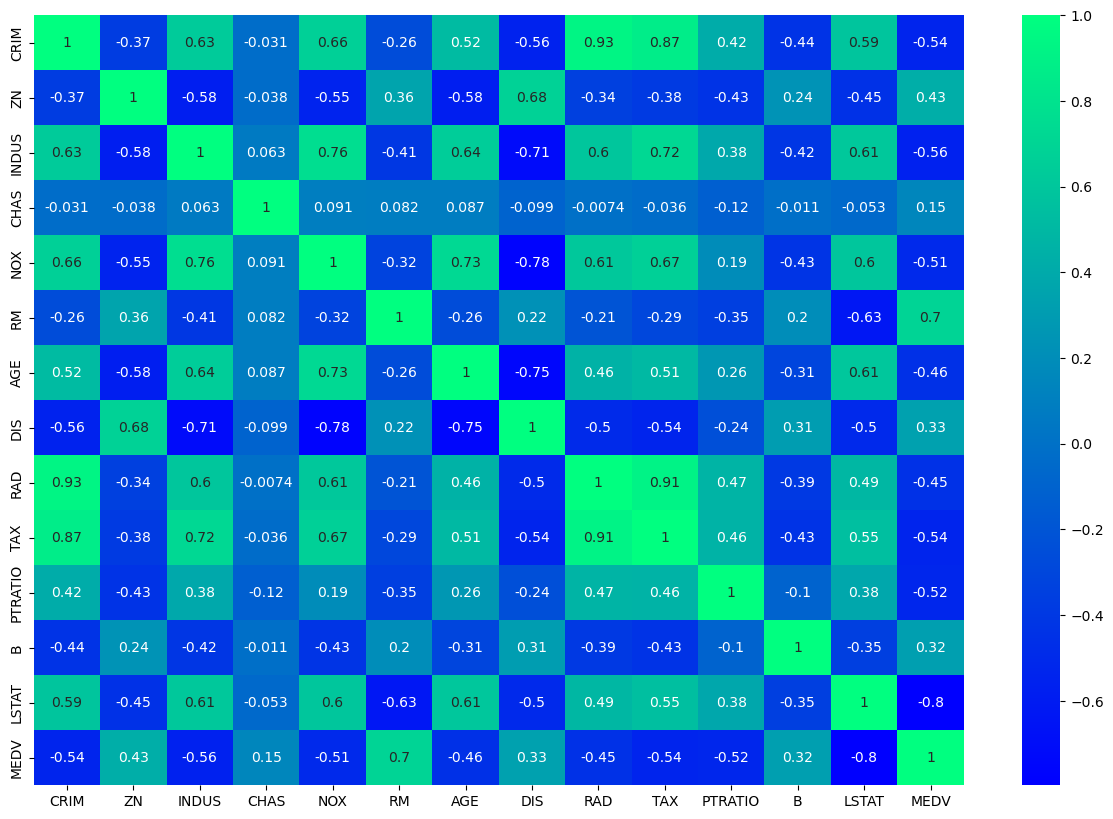

In [26]:
# Set the size of the plot to ensure readability of annotations and labels
plt.figure(figsize=(15, 10))

# Plot the heatmap of the correlation matrix
# 'annot=True' displays the correlation coefficients in each cell
# 'cmap="winter"' applies a cool color gradient to visualize strength of correlation
sns.heatmap(matrix_corr, annot=True, cmap="winter")

In [27]:
# Training test spliting

x_train,x_test,y_train,y_test = train_test_split(house1.iloc[:,0:13],house1.iloc[:,-1],test_size=0.3,random_state=42)

In [28]:
pip = ColumnTransformer(
    transformers=[
        # Apply log(1 + x) transformation to columns 0, 1, 2, 4, 7, 9, 12
        ("log1p", FunctionTransformer(np.log1p), [0, 1, 2, 4, 7, 9, 12]),

        # Apply Box-Cox power transformation to columns 5, 6, 10, 11
        # Note: Box-Cox requires strictly positive data
        ("yeojohnson", PowerTransformer(method="box-cox"), [5, 6, 10, 11]),

        # Standardize columns 0, 1, 2, 4, 7, 9, 12 by removing the mean and scaling to unit variance
        ("scaler", StandardScaler(), [0, 1, 2, 4, 7, 9, 12])
    ],
    # Leave all other columns untouched (passthrough)
    remainder="passthrough"
)


In [29]:
# Define a function to train and evaluate a regression model using a pipeline
def model3(name_model):
    # Instantiate the model class passed as argument (e.g., LinearRegression, RandomForestRegressor, etc.)
    cf = name_model()

    # Create a pipeline that first applies preprocessing (pip) then fits the model (cf)
    pip1 = Pipeline([
        ("preprocessing", pip),  # Data preprocessing steps (scaling, transformations)
        ("model", cf)            # The regression model to train
    ])
    
    # Fit the pipeline on the training data
    pip1.fit(x_train, y_train)
    
    # Predict target values for the test data
    y_pred = pip1.predict(x_test)

    # Print the results summary for the given model
    print(f"\nüîç Results for {name_model.__name__}:")
    
    # Mean Squared Error (MSE): average squared difference between actual and predicted values
    print("mean squared error:", mean_squared_error(y_test, y_pred))
    
    # Mean Absolute Error (MAE): average absolute difference between actual and predicted values
    # **Note:** You mistakenly printed MSE again here; should use mean_absolute_error instead
    print("mean absolute error:", mean_absolute_error(y_test, y_pred))
    
    # Root Mean Squared Error (RMSE): square root of MSE, gives error in original units
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    
    # R-squared score: proportion of variance explained by the model (closer to 1 is better)
    print("r2_score:", r2_score(y_test, y_pred))
    
    # Adjusted R-squared: adjusted for the number of predictors to avoid overfitting bias
    # Formula: 1 - (1-R2)*(n-1)/(n-p-1)
    # where n = number of samples (152 here), p = number of predictors (13 here)
    print("adjusted r2:", 1 - (1 - r2_score(y_test, y_pred)) * (152 - 1) / (152 - 13 - 1))

In [30]:
name = [LinearRegression,Ridge,Lasso]
for al in name:
    model3(al)


üîç Results for LinearRegression:
mean squared error: 9.88271827843529
mean absolute error: 2.2714670797350522
RMSE: 3.1436790991504346
r2_score: 0.8068902034984844
adjusted r2: 0.788698700929501

üîç Results for Ridge:
mean squared error: 9.975483774165909
mean absolute error: 2.278818396484907
RMSE: 3.1583989257479663
r2_score: 0.8050775518070978
adjusted r2: 0.786715292194723

üîç Results for Lasso:
mean squared error: 17.289567649918496
mean absolute error: 3.3312769079454805
RMSE: 4.158072588341682
r2_score: 0.6621592565518754
adjusted r2: 0.6303336792705303
